## Data analysis
--- 
`NEW CONTINUING` script from [data_curation_cont](../notebooks/data_curation_cont.ipynb) script. 

Data processing pipeline: 
- [`data_curation.ipynb`](../notebooks/data_curation.ipynb)
- [`data_curation_cont.ipynb`](../notebooks/data_curation_cont.ipynb)
-  `data_analysis.ipynb` << You are here.

In [1]:
# loading required libraries
import nltk, pickle, pprint, csv, re, pylangacq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pretty printing for readability
cp = pprint.PrettyPrinter(compact=True, sort_dicts=True)

# loading data from last notebook
Lcorpus = pickle.load(open("../data/Lcorpus_cont.pkl", 'rb'))
Ncorpus = pickle.load(open("../data/Ncorpus_cont.pkl", 'rb'))

According to R. Brown (1973), the starting point of acquisition order research, the order of L1 acquisition of English morphemes is as follows: 

| Rank        | Morpheme    |
| ----------- | ----------- |
| 1   | Present progressive (*-ing*)    |
| 2/3   | *in, on*       |
| 4   | Plural (*-s*)  |
| 5   | Past irregular      |
| 6   | Possessive (*-'s*)   |
| 7  | Uncontractible copula (*is, am, are*)   |
| 8  | Articles (*a, the*)   |
| 9   | Past regular (*-ed*)      |
| 10   | Third person singular (*-s*)     |
| 11   | Third person irregular     |
| 12   | Uncontractible auxiliary (*is, am, are*)  |
| 13  | Contractible copula  |
| 14  | Contractible auxiliary   |

This project will not analyze all of these, but I will attempt to cover most of them.

To begin the analysis, I'll extract and count instances of particular morphemes from each text. First, I'll test this out on a single row using the present progressive (verb suffix *-ing*). The MOR annotation scheme for the TalkBank corpora can be found [here](https://talkbank.org/manuals/MOR.html#_Toc65933281).

In [2]:
Ncorpus.head(1)

,Filename,Participant,Age,Tokens,POS,Morphemes
0,03\03a.cha,11312/c-00020713-1,3;01,"[., when, he's, sleeping, ,, ., and, his, frog...","[None, conj, pro:sub, aux, part, cm, ., coord,...","[None, when, he, be&3S, sleep-PRESP, cm, , and..."


In [3]:
# -PRESP is the TalkBank MOR annotation for a verb in the present progressive
pattern = r'\w*-PRESP\b'
# sample row
presp_test = Ncorpus.Morphemes[0]
# find all present progressive morphemes
presps = re.findall(pattern, ' '.join(str(x) for x in presp_test))
print(presps, '\ncount:', len(presps))

['sleep-PRESP', 'get-PRESP', 'stand-PRESP', 'run-PRESP'] 
count: 4


The first participant in our data frame, age 3 years and 1 month, used the present progressive 4 times: 'sleeping', 'getting', 'standing', and 'running'. Let's take a closer look. 

In [ ]:
# code to extract words and surrounding context from tokens column

Now to define a function and get this information for the rest of the data.

In [4]:
def get_presp(x):
    pattern = r'\w*-PRESP\b'
    presps = re.findall(pattern, ' '.join(str(y) for y in x))
    return presps

In [5]:
# native speaker corpus 
Ncorpus['PresP_Count'] = Ncorpus.Morphemes.apply(get_presp).str.len()
Ncorpus.head()

,Filename,Participant,Age,Tokens,POS,Morphemes,PresP_Count
0,03\03a.cha,11312/c-00020713-1,3;01,"[., when, he's, sleeping, ,, ., and, his, frog...","[None, conj, pro:sub, aux, part, cm, ., coord,...","[None, when, he, be&3S, sleep-PRESP, cm, , and...",4
1,03\03b.cha,11312/c-00020714-1,3;04,"[they're, looking, at, it, ., and, there's, a,...","[pro:sub, aux, part, prep, pro:per, ., coord, ...","[they, be&PRES, look-PRESP, at, it, , and, the...",6
2,03\03c.cha,11312/c-00020715-1,3;04,"[there's, a, frog, in, there, ., he's, in, the...","[pro:exist, cop, det:art, n, prep, adv, ., pro...","[there, be&3S, a, frog, in, there, , he, be&3S...",8
3,03\03d.cha,11312/c-00020716-1,3;05,"[a, frog, a, person, ., a, person, ., a, boot,...","[det:art, n, det:art, n, ., det:art, n, ., det...","[a, frog, a, person, , a, person, , a, boot, ,...",23
4,03\03e.cha,11312/c-00020717-1,3;08,"[., there's, a, dog, ., and, there's, a, frog,...","[None, pro:exist, cop, det:art, n, ., coord, p...","[None, there, be&3S, a, dog, , and, there, be&...",3


In [6]:
# learner corpus
Lcorpus['PresP_Count'] = Lcorpus.Morphemes.apply(get_presp).str.len()
Lcorpus.head()

,Filename,Participant,Anon_ID,L1,Age,Education,Years_Learn,Years_Env,Tokens,POS,Morphemes,PresP_Count
0,Vercellotti\1060_3G1.cha,1060,fm5,Arabic,19.0,level4,more than 5 years,less than 1 year,"[my, topic, is, describe, your, favorite, meal...","[det:poss, n, cop, v, det:poss, adj, n, prep, ...","[my, topic, be&3S, describe, your, favorite, m...",5
1,Vercellotti\1060_3G2.cha,1060,fm5,Arabic,19.0,level4,more than 5 years,less than 1 year,"[the, topic, is, transportation, ., in, this, ...","[det:art, n, cop, n, ., prep, det:dem, n, qn, ...","[the, topic, be&3S, transport&dv-ATION, , in, ...",0
2,Vercellotti\1060_3G3.cha,1060,fm5,Arabic,19.0,level4,more than 5 years,less than 1 year,"[the, topic, is, someone, I, admire, ., I'll, ...","[det:art, n, cop, pro:indef, pro:sub, v, ., pr...","[the, topic, be&3S, someone, I, admire, , I, w...",0
3,Vercellotti\1060_4P1.cha,1060,fm5,Arabic,19.0,level4,more than 5 years,less than 1 year,"[the, topic, is, talking, about, a, problem, i...","[det:art, n, aux, part, prep, det:art, n, prep...","[the, topic, be&3S, talk-PRESP, about, a, prob...",4
4,Vercellotti\1060_4P2.cha,1060,fm5,Arabic,19.0,level4,more than 5 years,less than 1 year,"[the, topic, is, talk, about, something, I, re...","[det:art, n, cop, v, adv, pro:indef, pro:sub, ...","[the, topic, be&3S, talk, about, something, I,...",3


Doing the same for other important morphemes.

In [7]:
# in
def get_in(x):
    pattern = r'\bin\b'
    ins = re.findall(pattern, ' '.join(str(y) for y in x))
    return ins

# adding data to the data frames
Ncorpus['In_Count'] = Ncorpus.Morphemes.apply(get_in).str.len()
Lcorpus['In_Count'] = Lcorpus.Morphemes.apply(get_in).str.len()

In [8]:
# on
def get_on(x):
    pattern = r'\bon\b'
    ons = re.findall(pattern, ' '.join(str(y) for y in x))
    return ons

# adding data to the data frames
Ncorpus['On_Count'] = Ncorpus.Morphemes.apply(get_on).str.len()
Lcorpus['On_Count'] = Lcorpus.Morphemes.apply(get_on).str.len()

In [9]:
# past irregular
def get_pastirr(x):
    pattern = r'\w*&PAST\b'
    pastirr = re.findall(pattern, ' '.join(str(y) for y in x))
    return pastirr
# adding data to the data frames
Ncorpus['PastIrr_Count'] = Ncorpus.Morphemes.apply(get_pastirr).str.len()
Lcorpus['PastIrr_Count'] = Lcorpus.Morphemes.apply(get_pastirr).str.len()

In [10]:
# possessives
def get_poss(x):
    pattern = r'\w*-POSS\b'
    poss = re.findall(pattern, ' '.join(str(y) for y in x))
    return poss

# adding data to the data frames
Ncorpus['Poss_Count'] = Ncorpus.Morphemes.apply(get_poss).str.len()
Lcorpus['Poss_Count'] = Lcorpus.Morphemes.apply(get_poss).str.len()

In [11]:
# copula
def get_cop(x):
    pattern = r'cop'
    cops = re.findall(pattern, ' '.join(str(y) for y in x))
    return cops

# adding data to the data frames
Ncorpus['Cop_Count'] = Ncorpus.POS.apply(get_cop).str.len()
Lcorpus['Cop_Count'] = Lcorpus.POS.apply(get_cop).str.len()

In [12]:
# articles
def get_art(x):
    pattern = r'det:art'
    arts = re.findall(pattern, ' '.join(str(y) for y in x))
    return arts

# adding data to the data frames
Ncorpus['Art_Count'] = Ncorpus.POS.apply(get_art).str.len()
Lcorpus['Art_Count'] = Lcorpus.POS.apply(get_art).str.len()

In [13]:
# past regular
def get_pastreg(x):
    pattern = r'\w*-PAST\b'
    pastreg = re.findall(pattern, ' '.join(str(y) for y in x))
    return pastreg

# adding data to the data frames
Ncorpus['PastReg_Count'] = Ncorpus.Morphemes.apply(get_pastreg).str.len()
Lcorpus['PastReg_Count'] = Lcorpus.Morphemes.apply(get_pastreg).str.len()

In [14]:
# third person singular
def get_tps(x):
    pattern = r'\w*-3S\b'
    tps = re.findall(pattern, ' '.join(str(y) for y in x))
    return tps

# adding data to the data frames
Ncorpus['3PS_Count'] = Ncorpus.Morphemes.apply(get_tps).str.len()
Lcorpus['3PS_Count'] = Lcorpus.Morphemes.apply(get_tps).str.len()

In [15]:
# third person irregular
def get_tpirr(x):
    pattern = r'\w*&3S\b' 
    tpirr = re.findall(pattern, ' '.join(str(y) for y in x))
    return tpirr

# adding data to the data frames
Ncorpus['3PIrr_Count'] = Ncorpus.Morphemes.apply(get_tpirr).str.len()
Lcorpus['3PIrr_Count'] = Lcorpus.Morphemes.apply(get_tpirr).str.len()

In [16]:
# auxiliary
def get_aux(x):
    pattern = r'aux'
    aux = re.findall(pattern, ' '.join(str(y) for y in x))
    return aux

# adding data to the data frames
Ncorpus['Aux_Count'] = Ncorpus.POS.apply(get_aux).str.len()
Lcorpus['Aux_Count'] = Lcorpus.POS.apply(get_aux).str.len()

Morpheme counting completed. Morpheme counts alone are also not necessarily informative. These values need to be normalized so that they are not affected by other factors such as length of the text.

In [17]:
# token counts
Ncorpus['Token_Count'] = Ncorpus['Tokens'].str.len()
Lcorpus['Token_Count'] = Lcorpus['Tokens'].str.len()

In [18]:
# normalizing counts
Lcorpus[['PresP_Count', 'In_Count', 'On_Count', 'PastIrr_Count', 
        'Poss_Count', 'Cop_Count', 'Art_Count', 'PastReg_Count', 
        '3PS_Count', '3PIrr_Count', 'Aux_Count']] = Lcorpus[['PresP_Count', 'In_Count', 'On_Count', 'PastIrr_Count', 
        'Poss_Count', 'Cop_Count', 'Art_Count', 'PastReg_Count', 
        '3PS_Count', '3PIrr_Count', 'Aux_Count']].div(Lcorpus.Token_Count, axis=0)
Ncorpus[['PresP_Count', 'In_Count', 'On_Count', 'PastIrr_Count', 
        'Poss_Count', 'Cop_Count', 'Art_Count', 'PastReg_Count', 
        '3PS_Count', '3PIrr_Count', 'Aux_Count']] = Ncorpus[['PresP_Count', 'In_Count', 'On_Count', 'PastIrr_Count', 
        'Poss_Count', 'Cop_Count', 'Art_Count', 'PastReg_Count', 
        '3PS_Count', '3PIrr_Count', 'Aux_Count']].div(Ncorpus.Token_Count, axis=0)

In [32]:
# L1 corpus
Ncorpus['Age']= pd.Categorical(Ncorpus['Age'], ordered=True)
Ncorp_counts = Ncorpus[['Age', 'PresP_Count', 'In_Count', 'On_Count', 'PastIrr_Count', 
        'Poss_Count', 'Cop_Count', 'Art_Count', 'PastReg_Count', 
        '3PS_Count', '3PIrr_Count', 'Aux_Count']].groupby("Age").mean()
Ncorp_counts

,PresP_Count,In_Count,On_Count,PastIrr_Count,Poss_Count,Cop_Count,Art_Count,PastReg_Count,3PS_Count,3PIrr_Count,Aux_Count
Age,,,,,,,,,,,
3.01,0.050633,0.000000,0.025316,0.050633,0.000000,0.012658,0.063291,0.012658,0.000000,0.063291,0.037975
3.04,0.070827,0.031765,0.000000,0.007812,0.007812,0.042571,0.075646,0.007812,0.000000,0.061190,0.026432
3.05,0.064789,0.014085,0.016901,0.033803,0.000000,0.033803,0.118310,0.000000,0.005634,0.030986,0.028169
3.08,0.029412,0.039216,0.000000,0.039216,0.000000,0.058824,0.088235,0.009804,0.000000,0.098039,0.039216
3.09,0.041602,0.013056,0.006287,0.023674,0.002174,0.018576,0.102091,0.023606,0.002404,0.045664,0.039330
3.1,0.052163,0.022115,0.000000,0.017308,0.000000,0.018990,0.132692,0.012740,0.006250,0.066587,0.060096
3.11,0.042180,0.025553,0.019456,0.069399,0.003049,0.011252,0.104319,0.018293,0.000000,0.010309,0.008203
4.04,0.008811,0.013216,0.008811,0.070485,0.000000,0.022026,0.154185,0.048458,0.000000,0.004405,0.017621
4.06,0.023090,0.025822,0.002232,0.020589,0.000000,0.014893,0.084395,0.026786,0.016393,0.031287,0.028054


In [20]:
# L2 corpus
Lcorpus['Years_Learn'] = pd.Categorical(Lcorpus['Years_Learn'],
                                        ['less than 1 year', '1-2 years', '3-5 years',
                                         'more than 5 years'])
Lcorp_counts = Lcorpus[['Years_Learn', 'PresP_Count', 'In_Count', 'On_Count', 'PastIrr_Count', 
        'Poss_Count', 'Cop_Count', 'Art_Count', 'PastReg_Count', 
        '3PS_Count', '3PIrr_Count', 'Aux_Count']].groupby("Years_Learn").mean()
Lcorp_counts

,PresP_Count,In_Count,On_Count,PastIrr_Count,Poss_Count,Cop_Count,Art_Count,PastReg_Count,3PS_Count,3PIrr_Count,Aux_Count
Years_Learn,,,,,,,,,,,
less than 1 year,0.012039,0.021260,0.000878,0.027361,0.000226,0.041170,0.051258,0.009242,0.002192,0.028158,0.013034
1-2 years,0.011227,0.021712,0.003009,0.021357,0.000000,0.032253,0.048732,0.006873,0.002880,0.025825,0.013120
3-5 years,0.012935,0.022241,0.000526,0.017896,0.000586,0.041438,0.055516,0.005897,0.002357,0.033155,0.011308
more than 5 years,0.012690,0.023746,0.003156,0.015538,0.000336,0.036640,0.061591,0.005599,0.004418,0.029697,0.012471


These data frames are not the easiest to parse. From a brief glance at the native speaker corpus, it appears that there may be some patterns in the occurence of partiuclar morphemes that seem to increase with age through the proposed acquisition order. However, the learner corpus doesn't appear to demonstrate any discernable pattern at this stage. Generating some visualizations should help make sense of this. 

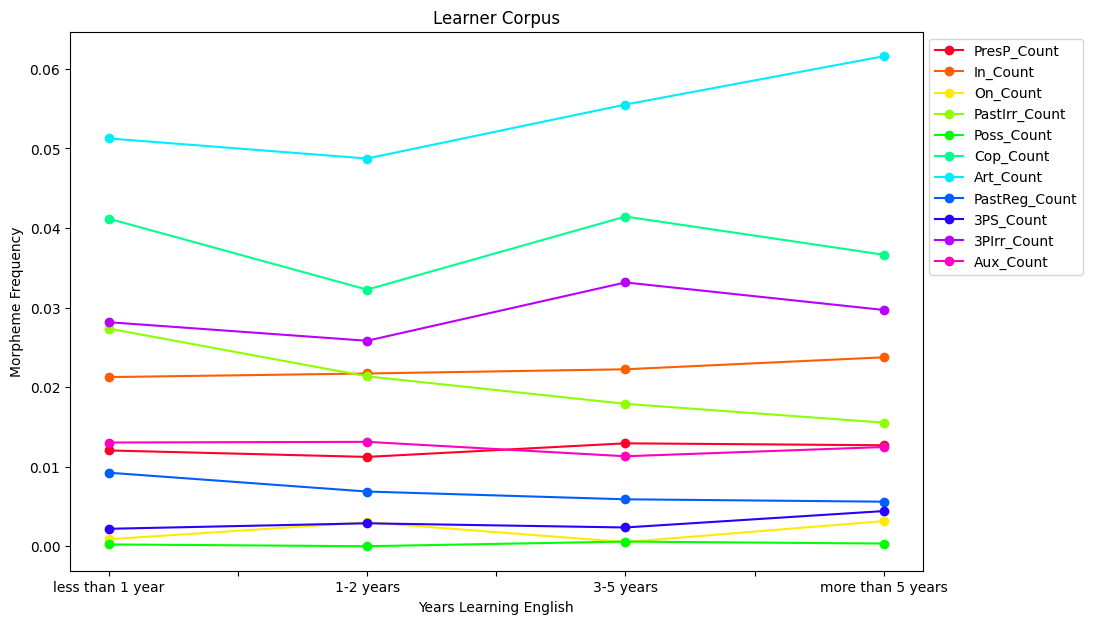

In [77]:
ax= Lcorp_counts.plot(use_index=True, figsize= (11,7), colormap= 'gist_rainbow', marker='o',
                  xlabel= 'Years Learning English', ylabel= 'Morpheme Frequency', title= 'Learner Corpus')
ax.legend(bbox_to_anchor=(1, 1))

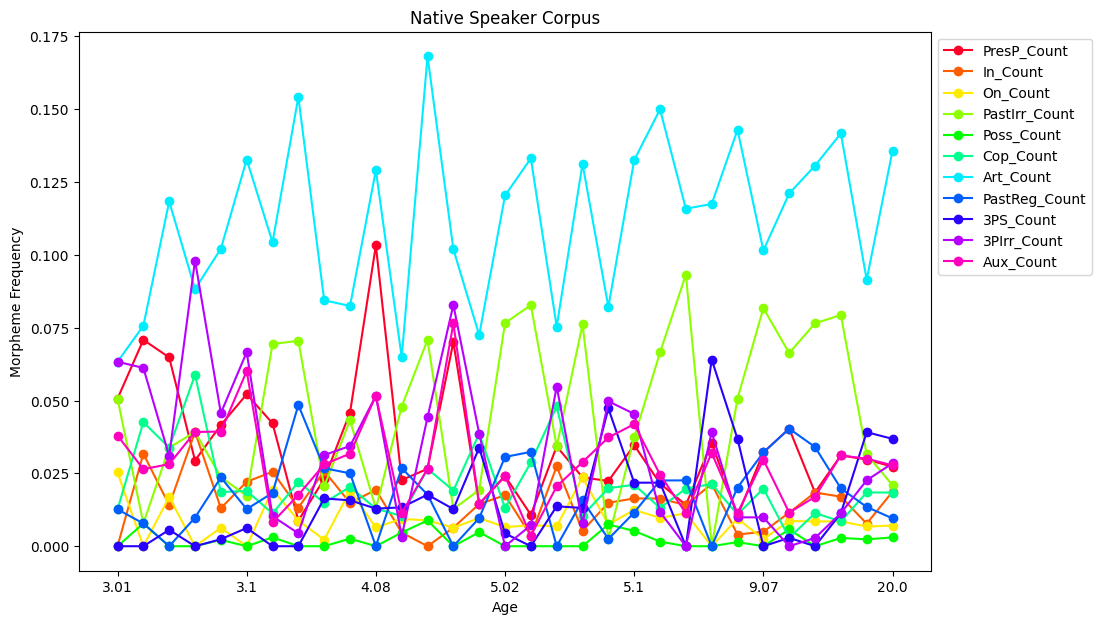

In [80]:
ax= Ncorp_counts.plot(use_index=True, figsize= (11,7), colormap= 'gist_rainbow', marker='o',
                  xlabel= 'Age', ylabel= 'Morpheme Frequency', title= 'Native Speaker Corpus')
ax.legend(bbox_to_anchor=(1, 1))

In [22]:
Ncorp_counts.to_csv(r'../data_samples/Ncorp_counts.csv', header=True)
Lcorp_counts.to_csv(r'../data_samples/Lcorp_counts.csv', header=True)